# Basics of MLP
- Objective: create vanilla neural networks (i.e., Multilayer perceptrons) for simple regression/classification tasks with Keras

## MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>
<center>**MLP with one hidden layer**</center>
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" style="width: 500px"/>
<br>
<center>**MLP with two hidden layers**</center>
- Number of input neurons: 3
- Number of hidden neurons: (4, 4)
- Number of output neurons: 1


## MLP for Regression tasks
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

In [1]:
from tensorflow.keras.datasets import boston_housing

C:\Users\anilj\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [79]:
import pandas as pd
# Load the dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
# Column names based on Boston Housing dataset description
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for first 5 rows
df_boston = pd.DataFrame(x_train[:5], columns=column_names)
df_boston["Target (Price in $1000s)"] = y_train[:5]

# Display the first 5 rows
print(df_boston)

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  Target (Price in $1000s)  
0     21.0  396.90  18.72                      15.2  
1     14.7  395.38   3.11                      42.3  
2     20.2  375.52   3.26                      50.0  
3     20.2  396.90   8.01                      21.1  
4     20.2  391.43  14.65                      17.7  


### Dataset Description
- Boston housing dataset has total 506 data instances (404 training & 102 test)
- 13 attributes (features) to predict "the median values of the houses at a location"
- Doc: https://keras.io/datasets/

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### 1. Creating a model
- Keras model object can be created with Sequential class
- At the outset, the model is empty per se. It is completed by **'adding'** additional layers and compilation
- Doc: https://keras.io/models/sequential/

In [82]:
from tensorflow.keras.models import Sequential

In [83]:
model = Sequential()

### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- Doc: https://keras.io/layers/core/

In [84]:
from tensorflow.keras.layers import Activation, Dense

In [85]:
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (13,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem

C:\Users\anilj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
# This is equivalent to the above code block
model.add(Dense(28, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(14, activation = 'sigmoid'))
model.add(Dense(7, activation = 'sigmoid'))
model.add(Dense(1))

### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [100]:
from tensorflow.keras import optimizers

In [101]:
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer

In [102]:
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed

### Summary of the model

In [103]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 28)                  │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 14)                  │             406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658 (6.48 KB)

 Trainable params: 1,658 (6.48 KB)

 Non-trainable params: 0 (0.00 B)

### 2. Training
- Training the model with training data provided

In [104]:
model.fit(X_train, y_train, batch_size = 16, epochs = 100, verbose = 1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 324.7721 - mse: 324.7721   
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.8799 - mse: 84.8799 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.0222 - mse: 81.0222 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.8653 - mse: 82.8653   
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88.3551 - mse: 88.3551  
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.2820 - mse: 82.2820  
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.3812 - mse: 84.3812 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.1590 - mse: 85.1590
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.1309 - mse: 83.1309
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.6714 - mse: 86.6714 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.7371 - mse: 78.7371 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.0209 - mse: 79.0

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.2779 - mse: 92.2779   
Epoch 71/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.9391 - mse: 88.9391 
Epoch 72/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.5603 - mse: 84.5603 
Epoch 73/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.8392 - mse: 99.8392   
Epoch 74/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.7479 - mse: 91.7479 
Epoch 75/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.9015 - mse: 80.9015 
Epoch 76/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.6744 - mse: 96.6744 
Epoch 77/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.4504 - mse: 81.4504 
Epoch 78/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.6380 - mse: 87.6380 
Epoch 79/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.8870 - mse: 79.8870 
Epoch 80/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.0262 - mse: 91.0262    
Epoch 81/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.7140 - mse: 93.7140

### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [105]:
results = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76.8866 - mse: 76.8866  


In [106]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'compile_metrics']
[84.00959014892578, 84.00959014892578]


In [98]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  84.53743743896484
mse:  84.53743743896484


## MLP for classification tasks
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

### Dataset Description
- CIFAR-10 dataset contains 60,000 images in 10 classes - 50,000 for training and 10,000 for testing
- For more information, refer to [this Wikipedia article](https://en.wikipedia.org/wiki/CIFAR-10) or [Alex Krizhevsky's web site](https://www.cs.toronto.edu/~kriz/cifar.html)

In [63]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

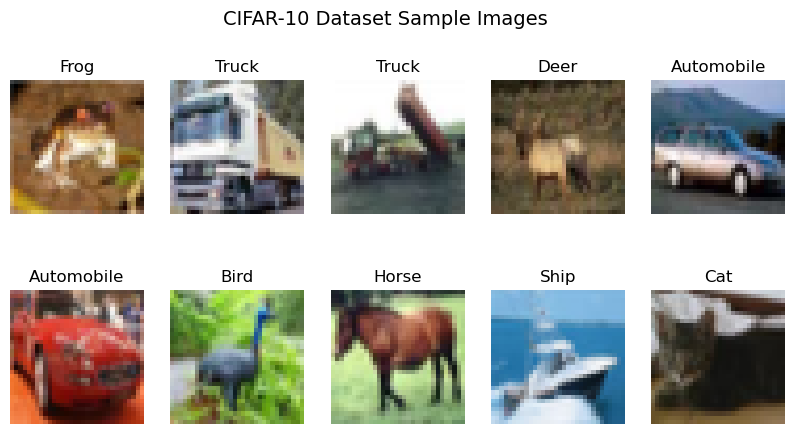

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class labels in CIFAR-10
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Plot the first 10 images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("CIFAR-10 Dataset Sample Images", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])  # Show image
    ax.set_title(class_labels[y_train[i][0]])  # Set label
    ax.axis("off")

plt.show()


In [108]:


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# Flatten images from (32,32,3) to (3072,)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




x_train shape: (50000, 3072)
x_test shape: (10000, 3072)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [109]:
x_train 

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

### 1. Creating a model
- Same with regression model - use ```Sequential()```

In [111]:
model = Sequential()

### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added
- Doc: https://keras.io/layers/core/

In [112]:
# Build the model
model = Sequential()
model.add(Dense(50, input_shape=(x_train.shape[1],), activation='relu'))  # Input layer
model.add(Dense(50, activation='relu'))  # Hidden layer
model.add(Dense(50, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer (softmax for multi-class classification)

### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [113]:
from tensorflow.keras import optimizers

In [114]:
sgd = optimizers.SGD(learning_rate  = 0.01)    # stochastic gradient descent optimizer

In [115]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Summary of the model

In [116]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                     │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,260 (622.11 KB)

 Trainable params: 159,260 (622.11 KB)

 Non-trainable params: 0 (0.00 B)

### 2. Training
- Training the model with training data provided

In [117]:
model.fit(x_train, y_train, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1787 - loss: 2.1929
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3132 - loss: 1.9223
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3397 - loss: 1.8520
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3660 - loss: 1.7984
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3800 - loss: 1.7530
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3947 - loss: 1.7055
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4044 - loss: 1.6862
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4159 - loss: 1.6533
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4145 - loss: 1.6495
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4293 - loss: 1.6154
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4363 - loss: 1.6021
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [118]:
results = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5047 - loss: 1.4018


In [73]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'compile_metrics']
[1.4653562307357788, 0.4830000102519989]


In [74]:
# printing out the results separately
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  1.4653562307357788
accuracy:  0.4830000102519989


In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [120]:
# Get predictions
y_pred = model.predict(x_test)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
